# Identifying cracks in infrastructure

Fixed-viewpoint security cameras can be used to alert about faults in concrete (or similar things).

The idea is that the edge-like structures in the picture will change. It turns out that you don't need high
resolution imagery to do this.

In [1]:
%matplotlib inline
import matplotlib
import skimage.io
import skimage.feature
import skimage.filters
import skimage.morphology

def show(im): matplotlib.pyplot.imshow(im, cmap=matplotlib.pyplot.cm.gray)
def show_as_grey(im): show(skimage.color.rgb2grey(im))
def show_colour(im): matplotlib.pyplot.imshow(im)
    
def edge_detection(im):
    return skimage.filters.sobel(skimage.color.rgb2grey(im))

In [2]:
before = skimage.io.imread('paving-before.jpg')
after = skimage.io.imread('paving-after.jpg')

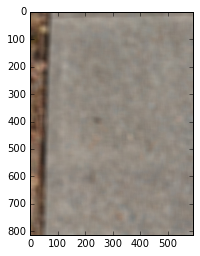

In [3]:
show(before)

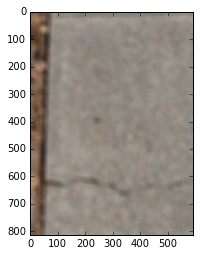

In [4]:
show(after)

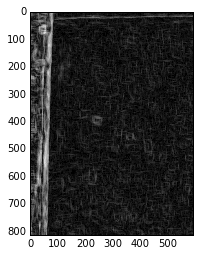

In [5]:
show(edge_detection(before))

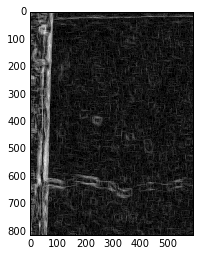

In [6]:
show(edge_detection(after))

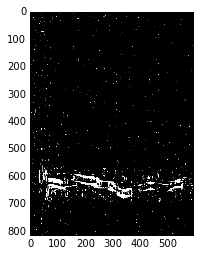

In [7]:
changes = edge_detection(after) - edge_detection(before)
thresholded_changes = changes > 0.005
show(thresholded_changes)

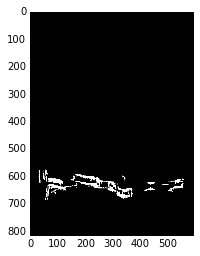

In [8]:
show(skimage.morphology.remove_small_objects(thresholded_changes))